# EDA Titanic

dataset: https://www.kaggle.com/c/titanic

| Variable | Definicion | Keys |
| --- | --- | --- |
| Survival | Survival | 0 = No, 1 = Yes |
| Pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| Sex | Sex | - |
| Age | Age in years | - |
| SibSp | # of siblings / spouses aboard the Titanic | - |
| Parch | # of parents / children aboard the Titanic | - |
| Ticket | Ticket number | - |
| Fare | Passenger fare | - |
| Cabin | Cabin number | - |
| Embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(
            r"..\_datasets\titanic.csv.gz"
            , sep=","
            , dtype=str     ## avoid any mistake for EDA
        )

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C


In [4]:
# describe the dataset
data.describe(include='all').T

,count,unique,top,freq
PassengerId,891,891,1,1
Survived,891,2,0,549
Pclass,891,3,3,491
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Age,714,88,24,30
SibSp,891,7,0,608
Parch,891,7,0,678
Ticket,891,681,347082,7
Fare,891,248,8.05,43


In [5]:
# make numeric columns numbers
cols_num = ["Survived","Pclass","Age","Parch","Fare"]
data[cols_num] = data[cols_num].apply(pd.to_numeric)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
# Nulls
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.groupby("Survived",dropna=False).agg(
        mean_age=("Age","mean")
        , p50_age=("Age",lambda x: x.quantile(0.5))
    )

,mean_age,p50_age
Survived,,
0,30.626179,28.0
1,28.343690,28.0


In [9]:
data.groupby(
            ["Survived","Sex"]
            ,dropna=False).agg(
                    mean_age=("Age","mean")
                    , p50_age=("Age",lambda x: x.quantile(0.5))
                )

mean_age  p50_age
Survived Sex                       
0        female  25.046875     24.5
         male    31.618056     29.0
1        female  28.847716     28.0
         male    27.276022     28.0

# Visual exploration

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

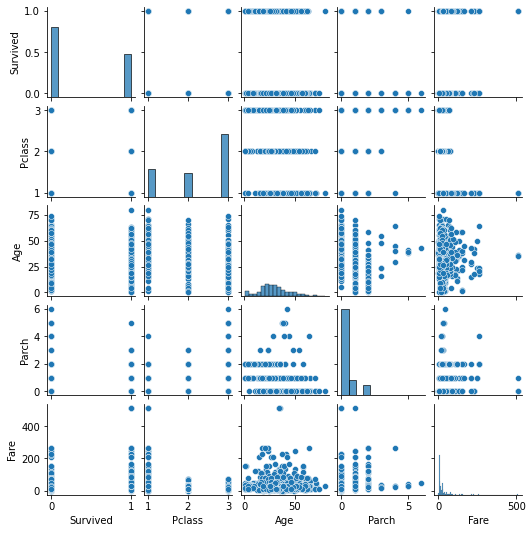

In [11]:
sns.pairplot(data, height=1.5)
plt.show()

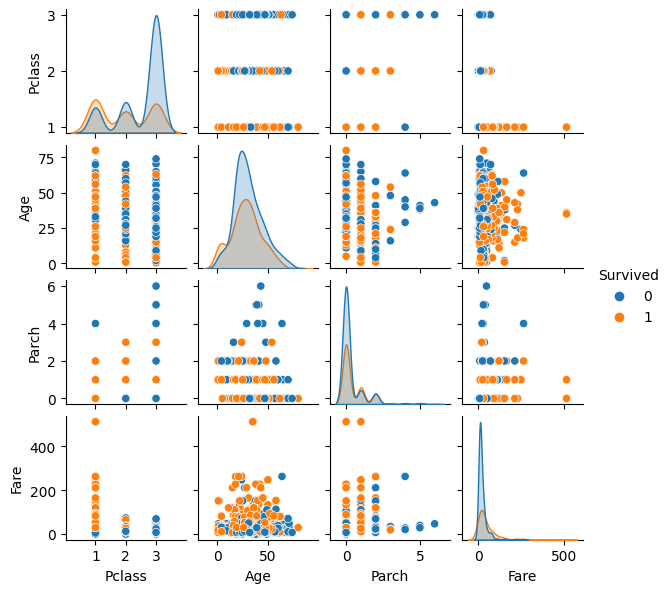

In [12]:
sns.pairplot(data, height=1.5, hue="Survived");
plt.show()

Plot when NULLS

In [13]:
cols_with_nulls = list(data.isnull().sum()[data.isnull().sum()>0].index)
cols_with_nulls

['Age', 'Cabin', 'Embarked']

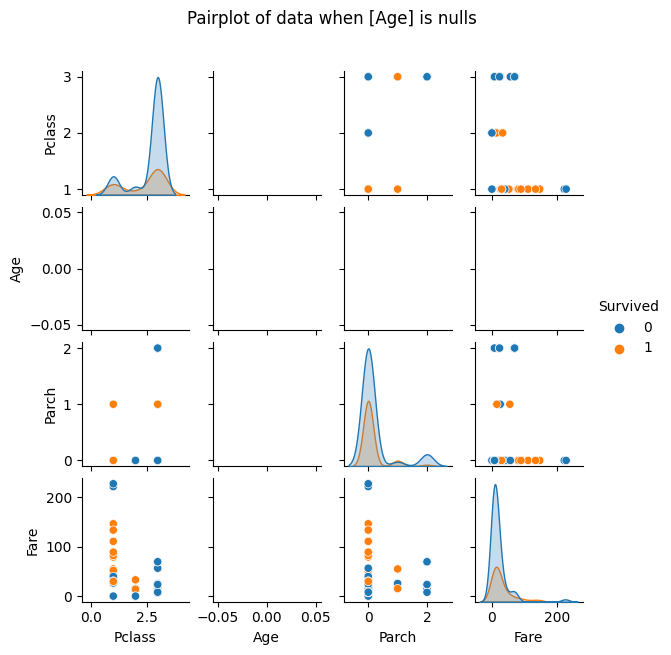

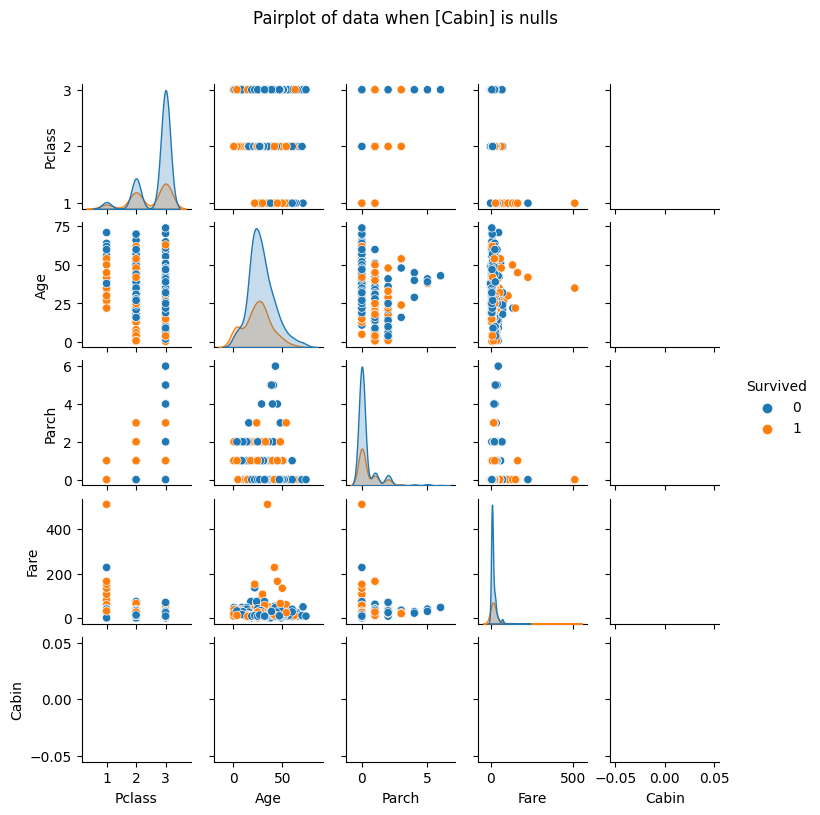

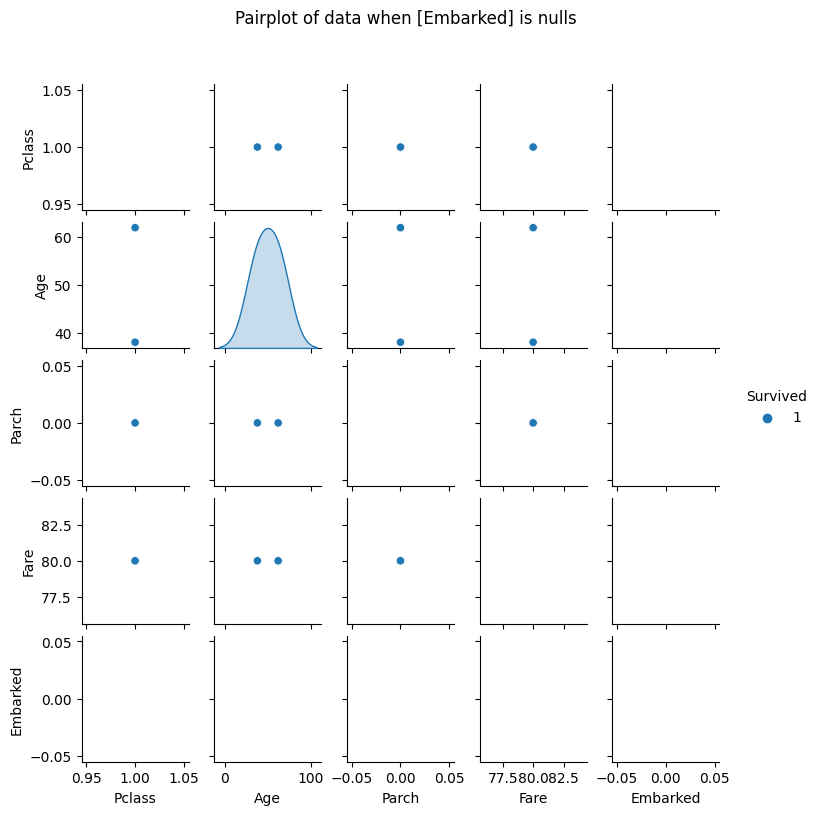

In [14]:
for c in cols_with_nulls:
    sns.pairplot(data[data[c].isnull()], height=1.5, hue="Survived");
    plt.suptitle(f"Pairplot of data when [{c}] is nulls", y=1.08)
    plt.show()
    

[]

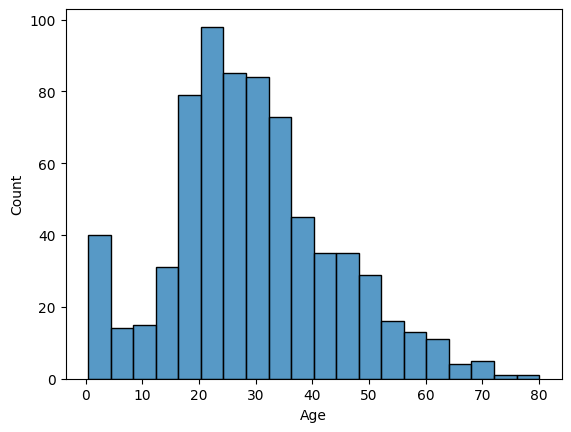

In [15]:
sns.histplot(data,x="Age")
plt.plot()